1. Rewrite Notebook
2. Rewrite code to fit notebook
3. Get all plots according to notebook
4. Comment and transform code
5. Push notebook

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set 1

## 1.1 Vibrating string

#### A. Discriteze the wave equation and write it in a form suitable for implementing in a computer program.


#### B. Implement the time stepping. Determine the time development of the string, with the following initial conditions. The string is at rest at t = 0, i.e. Ψ′(x,t = 0) = 0. Take c = 1 and use the time step ∆t = 0.001. Plot the result at several times in the same figure, e.g. varying the color of the curve.

#### C. Make an animated plot of the time development.

## 1.2 The Time Dependent Diffusion Equation

#### D. Determine the equation to use at the boundaries of the domain. Clearly show the ranges of the indices of the grid. A figure is extremely helpful for figuring this out.

We use assume periodic boundary conditions at x = 0 and x = 1. For x = 1, the scheme would then be:

   
   
$c^{k+1}_{i,j}$ = $c^K_{N,j} + \frac{\delta t D}{\delta x^2}$ $(c^k_{0, j} + c^k_{N-1,j} + c^k_{N,j-1} - 4c^k_{N,j})$

In [165]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import matplotlib.animation as animation



class diffusion_equation():
    
    def __init__(self, times=[0.001,0.01]):
        
        # initalizing values over grid
        self.Nx, self.Ny = 50, 50
        self.dx, self.dy = 1/self.Nx, 1/self.Ny
        self.D = 1
        
        # time values
        self.dt = 0.00001
        self.times = times
        self.time = self.times[-1]
        
        
        # initial values
        self.c = np.zeros((self.Ny,self.Nx))
        self.c[0] = 1
        self.cs = []
        self.timesteps = np.arange(0, self.time+self.dt, self.dt)
        
        
    def time_dependent_formula(self, j, i):
        # apply time dependent formula
        self.c[j][i] = self.c[j][i] + (self.dt*self.D/self.dx**2)*(self.c[j][(i+1)%self.Nx] + 
                self.c[j][(i-1)%self.Nx] + self.c[j+1][i] + self.c[j-1][i] - 4*self.c[j][i])
        return self.c
    
    def analytical_formula(self, count):
        analytical_solution = []
        for y in np.arange(0.,1.0,.001):
            # set i and Dt
            i = (self.Ny-1)
            Dt = self.times[count]
            # apply analytical formula
            y_sol = np.sum([erfc((1-y+2*i)/(2*sqrt(Dt))) - 
                                      erfc((1+y+2*i)/(2*sqrt(Dt))) for i in range(self.Ny)])
            # add result to a list
            analytical_solution.append(y_sol)
        # return analytical solutions
        return analytical_solution
    
    def time_dependent_iteration(self):
        with tqdm(total=self.time/self.dt) as pbar:
            # time-stepping
            for timestep in self.timesteps:
                # all vertical lines
                for j in range(1,self.Ny-1):
                    # all horizontal lines
                    for i in range(self.Nx):
                        self.time_dependent_formula(j, i)
                # add timesteps to plot
                if timestep in self.times:
                    self.cs.append(copy.copy(self.c))
                pbar.update()

    def plot_results(self, showComparison=False, showProgress=False, makeVid=False):
        
        if showComparison == True:
            count = 0
            for c in self.cs:
                # plot the simulation result line
                line1, = plt.plot(np.arange(0.,1,1/self.Ny),list(reversed(c[:,int(self.Ny/2)])), 'k',label='simulation')
                # calculate and plot the analytical result line
                analytical_solution = self.analytical_formula(count)
                line2, = plt.plot(np.arange(0.,1,0.001),analytical_solution, 'k--',label='analytical solution')
                count += 1

            # set title and labels
            plt.title('Simulation vs. Analytical solutions of the time dependent diffusion equation')
            plt.legend(handles=[line1,line2], loc='best')
            plt.ylabel("c")
            plt.show()  
        
        if showProgress == True:
            count = 0
            # show progress of diffusion visually
            for c in self.cs:
                plt.imshow(c, cmap='bone')
                plt.title('Visualization of the diffusion at time ' + str(self.times[count]))
                plt.show()
                count += 1
                
        if makeVid == True:
            fig = plt.figure()

            ims = []
            count = 0
            for c in self.cs:
                im = plt.imshow(c, cmap='bone')
                
                ims.append([im])
                count += 1

            ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
            ani.save('dynamic_images.html')


1001it [00:07, 138.71it/s]                                      


In [ ]:
model = diffusion_equation()
model.time_dependent_iteration()

#### E. Test the correctness of your simulation. Compare to the analytic solutions, plot c(y) for different times. 

10001it [01:12, 138.59it/s]                            


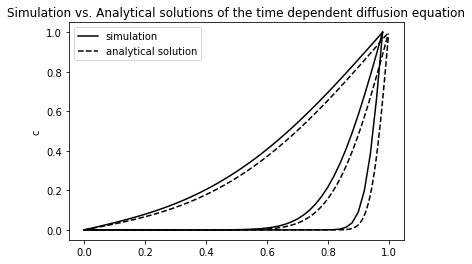

In [131]:
model.plot_results(showComparison=True)

#### F. Plot the results, show the 2D domain, with a color representing the concentration at each point. Make a plot of the state of the system at several times: t = {0, 0.001, 0.01, 0.1, and 1}.

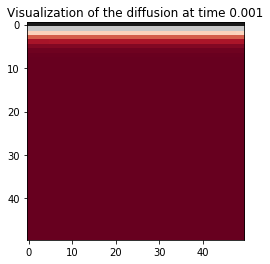

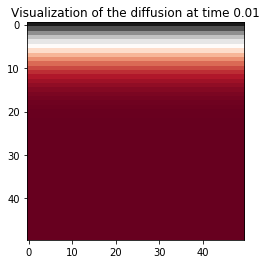

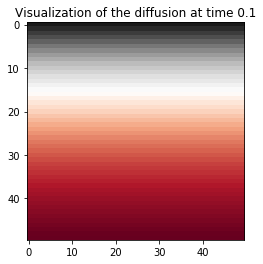

In [132]:
model.plot_results(showProgress=True)

#### G. Make an animated plot of the time dependent diffusion equation until equilibrium.

99001it [11:42, 140.97it/s]                                       
MovieWriter ffmpeg unavailable. Trying to use html instead.


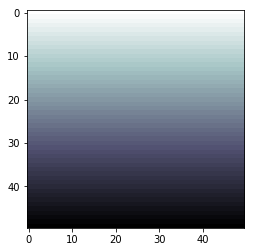

In [171]:
times = np.arange(0, 1, .01)

model = diffusion_equation(times)
model.time_dependent_iteration()

model.plot_results(makeVid=True)

# question for TA: animated plot of the visualization or the graph? 

## 1.3 The Time Independent Diffusion Equation

## 1.4 The Jacobi Iteration

## 1.5 The Gauss-Seidel Iteration

## 1.6 Successive Over Relaxation

####  H. Implement the Jacobi iteration, the Gauss-Seidel method and SOR. Try N = 50. Test the methods by comparing the result to the analytical result in eq. (5), i.e. the linear dependence of the concentration on y.

#### J. In the SOR method, find the optimal ω. How does it depend on N?.

#### G. Implement the possibility to include objects into the computational domain. The objects should be sinks. 
    - Experiment a little bit with some objects in the computational domain (e.g. a rectangle or a few rectangles, ...). 
    - What is the influence on the number of iterations?
    - What about the optimal ω , is it influenced by the presence of objects? Look at the resulting concentration fields, and try to interpret what happens. 

#### H. Optional. Think of a way to incorporate objects with insulating material in your domain. What changes in the time evolution of the system? And in the final state?